In [1]:
from schulplots.utils.math_parser import parser

parser.exprStack[:] = []
results = parser.bnf.parseString("-2 < x and x < 4 and y < 0.5")
print (results)
print(parser.exprStack)


['-', '2', '<', 'x', 'and', 'x', '<', '4', 'and', 'y', '<', '0.5']
['2', 'unary -', 'x', '<', 'x', '4', '<', 'and', 'y', '0.5', '<', 'and']


In [9]:
import numpy as np

x = np.linspace(-6, 6, 101)
vars = dict(x= x)
%timeit stack = parser.compile_expression("2 <= x and not x > 3.7")
%timeit res1 = parser.evaluate_compiled_expression(stack, vars)

#%timeit res2 = eval("(2 <= x) & ~ (x > 3.7)", vars)


835 µs ± 6.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.85 µs ± 29.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
from schulplots.utils.math_expression import MathExpression
import numpy as np

m = MathExpression("2 <= x and not (x > 3.7)")
x = np.linspace(-6, 6, 101)
vars = dict(x= x)

In [3]:
ii  = m.evaluate(vars)
print(x[ii])

[2.04 2.16 2.28 2.4  2.52 2.64 2.76 2.88 3.   3.12 3.24 3.36 3.48 3.6 ]


In [4]:
m=MathExpression(" not x < 0 and (not abs(sin(x)) < 0.3+0.2 and x<10000)")
y = np.sin(x)
try:
    y[~m.evaluate(vars)]= np.inf
    np.sin(x[m.evaluate(vars)])
except:
    print("error")
print(parser.results)


['not', 'x', '<', '0', 'and', ['not', ('abs', 1), [[('sin', 1), [['x']]]], '<', '0.3', '+', '0.2', 'and', 'x', '<', '10000']]


(-1.1, 1.1)

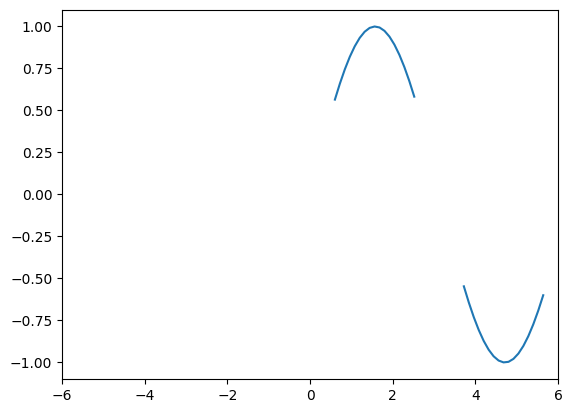

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y)
plt.xlim(-6,6)
plt.ylim(-1.1, 1.1)